In [2]:
#IMPORTING LIBRARIES WITH ALIASES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

In [4]:
#LOADING THE DATASET
data=pd.read_csv('C:\\Users\\RAKA SEN\\Desktop\\Python Project\\SeoulBikeData.csv', engine='python')
data.shape

(8760, 14)

In [11]:
# Removing duplicate data --no duplicates
data = data.drop_duplicates()

In [5]:
# Verifying number of rows after duplicates dropped - confirmed
data.shape

(8760, 14)

In [6]:
#DISPLAYING FIRST 5 ROWS OF THE DATASET
data.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#Displaying the column headers
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#DATA DESCRIPTION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#SUMMARY OF THE DATASET
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
# Renaming certain columns 
data = data.rename(columns={'Temperature(°C)': 'Temp','Humidity(%)':'Humidity', 'Dew point temperature(°C)': 'DewPtTemp', 'Solar Radiation (MJ/m2)':'SolarRadiation'})

In [11]:
data.head()

,Date,Rented Bike Count,Hour,Temp,Humidity,Wind speed (m/s),Visibility (10m),DewPtTemp,SolarRadiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
data['Seasons']=np.where(data['Seasons'] == 'Spring', 1, data['Seasons'])
data['Seasons']=np.where(data['Seasons'] == 'Summer', 2, data['Seasons'])
data['Seasons']=np.where(data['Seasons'] == 'Autumn', 3, data['Seasons'])
data['Seasons']=np.where(data['Seasons'] == 'Winter', 4, data['Seasons'])
data['Holiday']=np.where(data['Holiday'] == 'No Holiday', 0, data['Holiday'])
data['Holiday']=np.where(data['Holiday'] == 'Holiday', 1, data['Holiday'])
data['Functioning Day']=np.where(data['Functioning Day'] == 'No', 0, data['Functioning Day'])
data['Functioning Day']=np.where(data['Functioning Day'] == 'Yes', 1, data['Functioning Day'])

In [13]:
data.head()

,Date,Rented Bike Count,Hour,Temp,Humidity,Wind speed (m/s),Visibility (10m),DewPtTemp,SolarRadiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [14]:
# Updating data types to numeric. 
cols = ['Seasons','Holiday','Functioning Day']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Verify updated data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented Bike Count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   Temp               8760 non-null   float64
 4   Humidity           8760 non-null   int64  
 5   Wind speed (m/s)   8760 non-null   float64
 6   Visibility (10m)   8760 non-null   int64  
 7   DewPtTemp          8760 non-null   float64
 8   SolarRadiation     8760 non-null   float64
 9   Rainfall(mm)       8760 non-null   float64
 10  Snowfall (cm)      8760 non-null   float64
 11  Seasons            8760 non-null   int64  
 12  Holiday            8760 non-null   int64  
 13  Functioning Day    8760 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 958.2+ KB


In [15]:
# shows which columns have null values
data.isnull().any()

Date                 False
Rented Bike Count    False
Hour                 False
Temp                 False
Humidity             False
Wind speed (m/s)     False
Visibility (10m)     False
DewPtTemp            False
SolarRadiation       False
Rainfall(mm)         False
Snowfall (cm)        False
Seasons              False
Holiday              False
Functioning Day      False
dtype: bool

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind speed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'DewPtTemp'}>,
        <AxesSubplot:title={'center':'SolarRadiation'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>,
        <AxesSubplot:title={'center':'Seasons'}>,
        <AxesSubplot:title={'center':'Holiday'}>],
       [<AxesSubplot:title={'center':'Functioning Day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

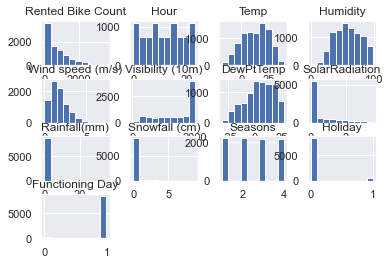

In [16]:
# plot histograms for all numeric columns 
data.hist()

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

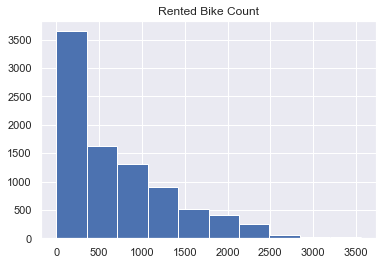

In [17]:
# Histogram of rented bike count 
data.hist('Rented Bike Count')

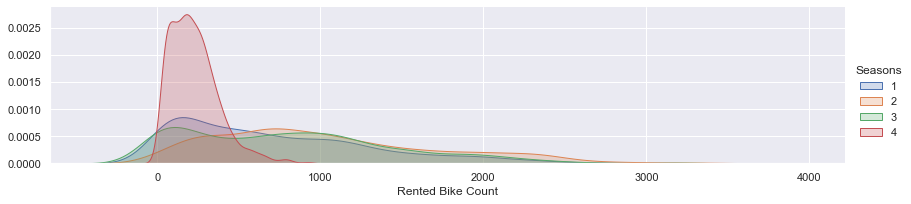

In [39]:
# Graph = Rented Bike Count by Season 
fig = sns.FacetGrid(data, hue='Seasons', aspect=4)
fig.map(sns.kdeplot, 'Rented Bike Count', shade=True)
fig.add_legend()
## In winter, the number of rented bikes is the least while the number is the maximun in summer.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


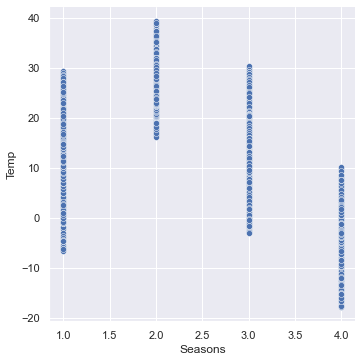

In [40]:
# Temperature Range by Season
sns.relplot('Seasons','Temp',data=data)
## Spring & Fall have comparatively moderate temperature (-5°C to 30°C), Summer is the hottest (15°C to 40°C) while Winter is the coldest (-18°C to 10°C)

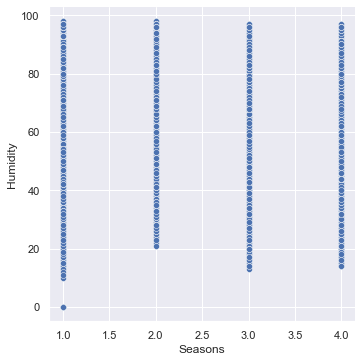

In [42]:
# Humidity by Season
sns.relplot('Seasons','Humidity',data=data)
#The variation in Humidity remains more or less throughout the year.
#The variation is slightly more in Spring while it is slightly less in Summer. 

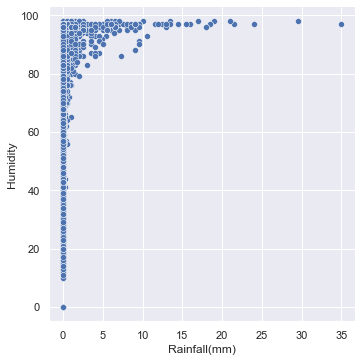

In [44]:
# Rainfall & Humidity 
sns.relplot('Rainfall(mm)','Humidity', data=data)
# The greater the rainfall, the greater is the humidity. 
#However, there are instances of the relative humidity being 100% when there is no rainfall.

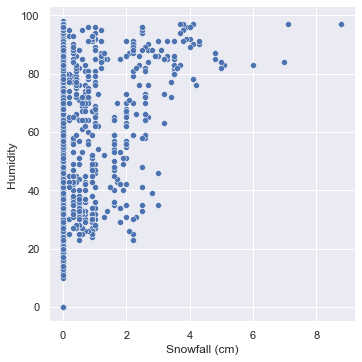

In [46]:
# Snowfall & Humidity
sns.relplot('Snowfall (cm)','Humidity', data=data)
# Higher the Snowfall, higher is the relative humdity.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


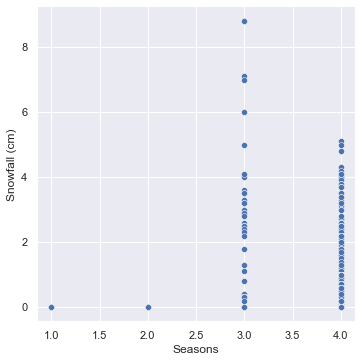

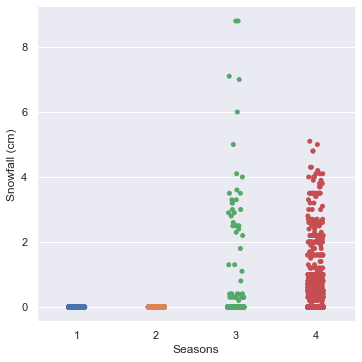

In [47]:
# Frequency & amount of snowfall by season
sns.relplot('Seasons','Snowfall (cm)',data=data)
sns.catplot('Seasons', 'Snowfall (cm)',data=data)
## It doesn't snow in Spring nor Summer. 
#Interestingly, Fall had the highest single day amount of snow with 8.8cm, rather than winter.

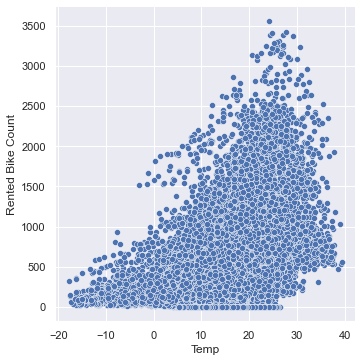

In [49]:
# Scatter plot bikes rented by temperature. 
sns.relplot('Temp','Rented Bike Count',data=data)
# When it's colder than -10 degrees, less than 500 bikes are rented.
# There is a positive correlation between the temperatre rising and the number of bikes rented.

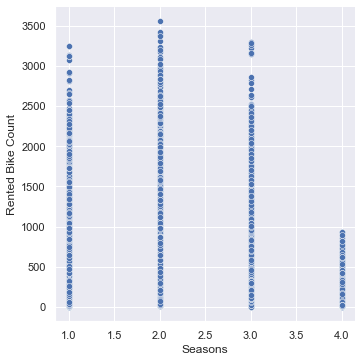

In [54]:
# Scatter plot of bikes rented by season 
sns.relplot('Seasons','Rented Bike Count',data=data)
# Winter has markedly less rentals than the other seasons.

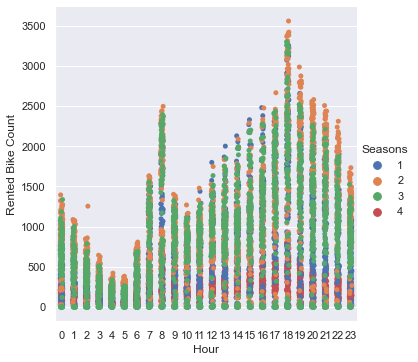

In [56]:
# Bike rented by hour & season 
sns.catplot('Hour','Rented Bike Count' , hue='Seasons', data=data)
# In the morning rental peaks at 7am, 8am,possibly because people are going to work and in the evening, it peaks at 6pm and 7pm, possibly because they are returning from work.
# Rental increases gradually from 10am to 6pm, thereafter it starts decreasing.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


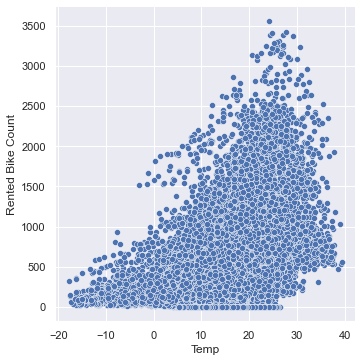

In [57]:
# Scatter plot of biked rented based on temperature. 
sns.relplot('Temp','Rented Bike Count',data=data)
# Most bikes rented when the temperature ranges between 20 - 30 degrees.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


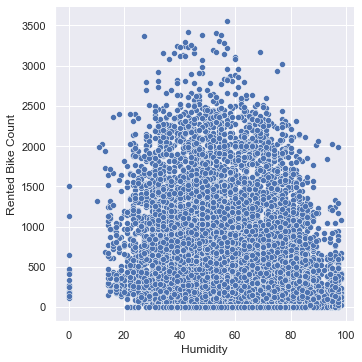

In [58]:
# Scatter plot of bikes rented by humdity. 
sns.relplot('Humidity','Rented Bike Count',data=data)
# This presented a bell curve where lots of bikes were rented when humidity was between 40 - 60 degrees.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


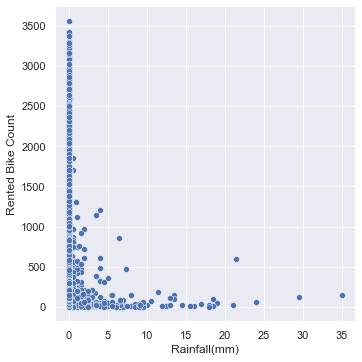

In [59]:
# Scatter plot of rainfall vs. bikes rented. 
sns.relplot('Rainfall(mm)','Rented Bike Count',data=data)
# Increase in rainfall causes rainfall to decrease.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


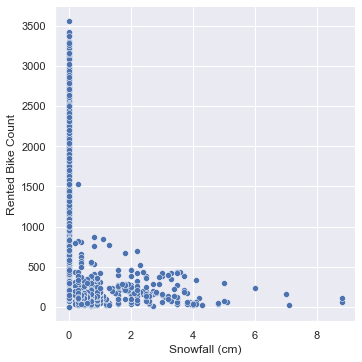

In [60]:
# Scatter plot of snowfall vs. bikes rented. 
sns.relplot('Snowfall (cm)','Rented Bike Count',data=data)
# Increase in snowfall causes less bikes to be rented.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


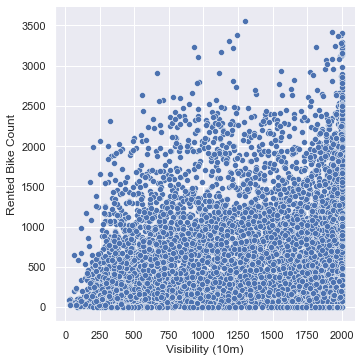

In [61]:
# Scatter plot of visibility vs. bikes rented. 
sns.relplot('Visibility (10m)','Rented Bike Count',data=data)
# When there is less visibility bikes are rented less frequently.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


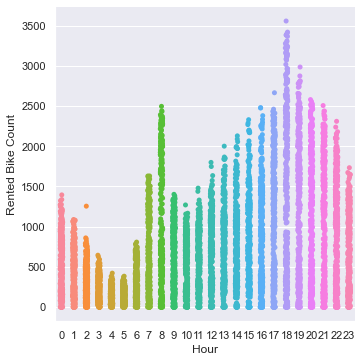

In [62]:
# Scatter plot of bikes rented by hour. 
sns.catplot('Hour', 'Rented Bike Count', data=data)
## On average, less than 500 bikes are rented at 4:00 & 5:00. 
## More than 2,500 bikes are rented on average at 8:00 and from 17:00 – 21:00.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


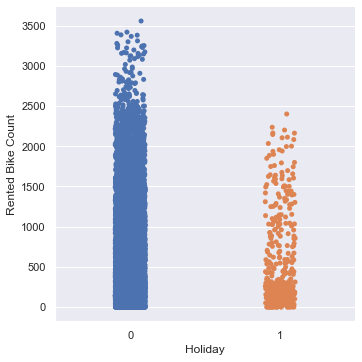

In [18]:
# Scatter plot of bikes rented during holidays. 
sns.catplot('Holiday', 'Rented Bike Count', data=data)
#Rentals are less during the holidays than that of working days.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


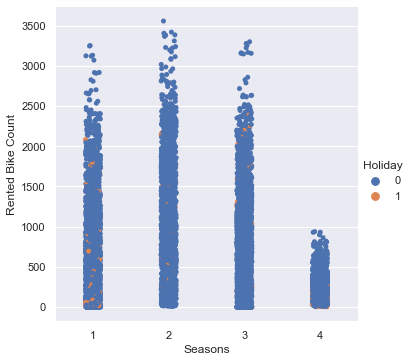

In [20]:
# Bike rented by season and holidays
sns.catplot('Seasons','Rented Bike Count' , hue='Holiday', data=data)
#Negligible rentals during winter holidays. 
#Marked difference in rentals between holidays.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


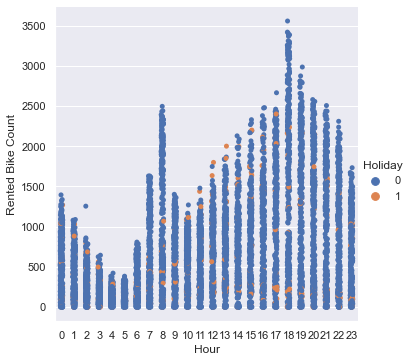

In [21]:
# Bike rented by hour and holidays
sns.catplot('Hour','Rented Bike Count' , hue='Holiday', data=data)
#Rentals are more or less similar on the holidays as far as hour of the day is considered.
#Comparatively, greater number of rentals are observed during 8am to 6pm, even on the holidays.

In [22]:
# Mean of bikes rented sorted by Holidays  
data.groupby('Holiday')['Rented Bike Count'].mean()
#Mean difference between rentals on holidays and working days is not much pronounced.

Holiday
0    715.228026
1    499.756944
Name: Rented Bike Count, dtype: float64

In [23]:
# Sum of bikes rented sorted by Holidays  
data.groupby('Holiday')['Rented Bike Count'].sum()
#Counts give a much clearer picturee.

Holiday
0    5956419
1     215895
Name: Rented Bike Count, dtype: int64

In [63]:
# Mean of bikes rented sorted by Season  
data.groupby('Seasons')['Rented Bike Count'].mean()
#Highest in Summer, least in winter.

Seasons
1     730.031250
2    1034.073370
3     819.597985
4     225.541204
Name: Rented Bike Count, dtype: float64

In [64]:
# Mean of bikes rented sorted by hour  
data.groupby('Hour')['Rented Bike Count'].mean()
#Highest at 6pm and least at 4am.

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

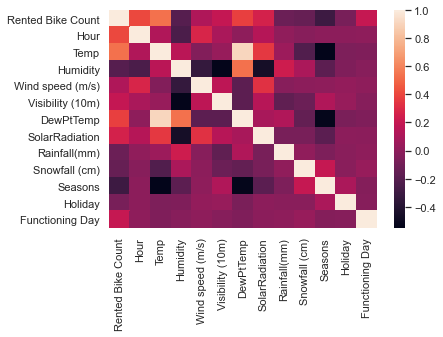

In [68]:
#Drawing heatmaps using seaborn library
sns.heatmap(data.corr(), annot=False) #annot=true for writing respective data values in respective cells of matrix
plt.show()

In [70]:
data.corr()

,Rented Bike Count,Hour,Temp,Humidity,Wind speed (m/s),Visibility (10m),DewPtTemp,SolarRadiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-2.970946e-01,-7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-7.869398e-20,1.691160e-20,0.005439
Temp,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-5.501761e-01,-5.593084e-02,-0.050170
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.790537e-01,-5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,2.090506e-03,2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.250331e-01,3.177281e-02,-0.026000
DewPtTemp,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-5.340374e-01,-6.675910e-02,-0.052837
SolarRadiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-1.809703e-01,-5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-5.732517e-02,-1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,2.035642e-01,-1.259072e-02,0.032089


Text(0.5, 1.0, 'Rented Bike Count')

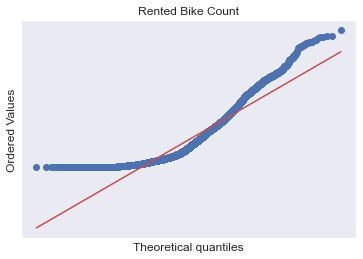

In [78]:
import pylab

#RENTED BIKE COUNT
x=data['Rented Bike Count']
pylab.xticks([]),pylab.yticks([])
stats.probplot(x, dist="norm", plot=pylab)
pylab.title('Rented Bike Count')

C:\Users\RAKA SEN\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RAKA SEN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Text(0.5, 1.0, 'Log (Rented Bike Count)')

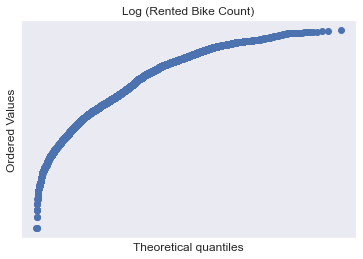

In [79]:
#Log RENTED BIKE COUNT
x1=np.log(data['Rented Bike Count'])
pylab.xticks([]),pylab.yticks([])
stats.probplot(x1, dist="norm", plot=pylab)
pylab.title('Log (Rented Bike Count)')
